In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib inline

import sys
sys.executable

'c:\\Data\\Projects\\phd\\cdl\\env\\Scripts\\python.exe'

In [2]:
from dinos.environments.playground import PlaygroundEnvironment
import dinos.environments.playground.scenes as playgroundScenes
# env = PlaygroundEnvironment(playgroundScenes.RoomWithWallsScene)
env = PlaygroundEnvironment(playgroundScenes.MultiCylindersWallsScene)

from cdl.agents.learners.curiosity.saggriac import SAGGLearner
learner = SAGGLearner(env.world.findHost())
learner.adaptiveModels = False
# list(learner.trainStrategies)[0].exploreNonPrimitive = False

from exlab.interface.graph import display
from dinos.utils.move import MoveConfig
from exlab.modular.logger import logger
import numpy as np


Loading chipmunk for Windows (64bit) [c:\Data\Projects\phd\cdl\env\lib\site-packages\pymunk\chipmunk.dll]
pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


2021-10-22 16:52:06 RedSky exlogger:c[29176] INFO [modular] Module 'PlaygroundEnvironment' has been started
2021-10-22 16:52:06 RedSky exlogger:c[29176] INFO [modular] Module 'ModelDataset' has been started
2021-10-22 16:52:06 RedSky exlogger:c[29176] INFO [modular] Module 'ModelDataset' has been started
2021-10-22 16:52:06 RedSky exlogger:c[29176] INFO [modular] Module 'Agent' has been started
2021-10-22 16:52:06 RedSky exlogger:c[29176] INFO [modular] Module 'Performer' has been started
2021-10-22 16:52:06 RedSky exlogger:c[29176] INFO [modular] Module 'planner' has been started
2021-10-22 16:52:06 RedSky exlogger:c[29176] INFO [modular] Module 'ModelDataset' has been attached to 'Agent'
2021-10-22 16:52:06 RedSky exlogger:c[29176] INFO [modular] Module 'InterestModelManager' has been started
2021-10-22 16:52:06 RedSky exlogger:c[29176] INFO [modular] Module 'Strategy autonomousStrategy' has been started
2021-10-22 16:52:06 RedSky exlogger:c[29176] INFO [modular] Module 'Strategy aut

[176.91240771]
[457.83949153 283.02826714]
[361.64347084 184.79177471 104.80935073]
[201.79197209 378.66343895 658.04635095 563.28500779]
[461.25481027 295.65182225  75.10659092 147.08500943 656.14937324]
[356.40566774 190.80094339 115.60276813  86.00581376 552.86978575
 105.38026381]
[352.28681497 513.07699227 793.91750201 691.15844783 209.69024775
 807.75862731 702.39376421]


In [3]:
from cdl.agents.tools.models.interest_model import InterestModel
mMove = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('Agent.position'), learner.propertySpace('Agent.lidar'))
# mRelativeObject = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Cylinder1.positionToAgent'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mObject = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mButton = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Button1.pressed'), learner.propertySpace('#Cylinder1.position'))

# mObject.limitMoves = 0.3

# mrp = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mrp = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.positionToAgent'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mo = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'), register=False)
# mo2 = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder2.position'), learner.propertySpace('#Cylinder2.positionToAgent'), register=False)

2021-10-22 16:52:06 RedSky exlogger:c[29176] INFO [model] New model added: ModelInterestModel(@☰#26↝🕹'#Agent.move'↕2 | @☰#29↝👁'#Agent.lidar':PRE↕8 => @☰#27↝👁'#Agent.position'↕2)


In [4]:
# env.displayGui(True)
# env.image()

LPoint2f(-250, 50) LPoint2f(850, 50)
LPoint2f(850, 48) LPoint2f(850, 503)
LPoint2f(850, 500) LPoint2f(-250, 500)
LPoint2f(-250, 503) LPoint2f(-250, 48)
LPoint2f(260, 200) LPoint2f(260, 400)
LPoint2f(50, 50) LPoint2f(50, 350)
LPoint2f(-100, 200) LPoint2f(-100, 500)
LPoint2f(550, 50) LPoint2f(550, 200)
LPoint2f(550, 350) LPoint2f(550, 500)
LPoint2f(700, 175) LPoint2f(700, 375)


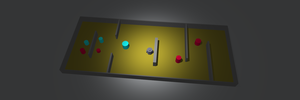

In [5]:
env.engine.graphicalEngines[1].image()

In [6]:
# %%prun -s cumtime
for _ in range(20):
    learner.train(100)
    env.evaluate()

c:\Data\Projects\phd\cdl\env\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Data\Projects\phd\cdl\env\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
2021-10-22 16:52:18 RedSky exlogger:c[29176] INFO 10...


[230.75528163]
[443.08125666 634.65344874]
[282.31188427 469.84678354 165.19382555]
[576.58997563 794.48599736 212.200377   341.97660739]
[242.53865671  24.18677324 654.400489   489.35978584 811.12082947]
[123.14625451 186.06719216 449.43742612 285.35066147 617.63500548]
[ 82.86132994 190.2051524  524.92761406 365.04520268 650.57666727
 165.02424064]
[212.13203436 442.47485804 300.42137074 191.426226   380.0842012
 295.78539518 275.96014205]


2021-10-22 16:52:18 RedSky exlogger:c[29176] INFO [interest] Creating interestMap for model ModelInterestModel(@☰#26↝🕹'#Agent.move'↕2 | @☰#29↝👁'#Agent.lidar':PRE↕8 => @☰#27↝👁'#Agent.position'↕2), strategy Strategy autonomousStrategy
2021-10-22 16:52:19 RedSky exlogger:c[29176] INFO 20...


[231.3201245]
[569.22754677 775.1264413 ]
[575.68133546 797.85838342 128.86038957]
[471.3066942  682.29392493 100.64790112 140.34600101]
[258.74504826 488.32980659 344.29202721 323.24603633 244.0758079 ]
[212.00235848 265.4241888  552.05525086 604.67511938 471.83153773
 353.73436361]
[ 68.26419266 285.81987335 554.15521291 545.81773515 454.04184829
 222.7666941  272.52339349]


2021-10-22 16:52:20 RedSky exlogger:c[29176] INFO 30...


[512.97758236]
[287.89234099 277.15699522]
[183.86136081 636.28374174 369.        ]
[ 55.02726597 459.79343188 233.94443785 209.83088429]
[253.71834778 264.31988196  83.09632964 374.31804659 199.06029237]
[376.04388042 139.35924799 148.44864432 497.48969839 322.13196054
 125.03599482]
[310.88583113 204.03921192 107.70329614 434.84365006 256.87740267
  60.67124525  65.27633568]


2021-10-22 16:52:21 RedSky exlogger:c[29176] INFO [performer] Iter (d0) 1: prediction is Data[#27↝👁'#Agent.position'↕2 @☰± 13.542, -12.807] ?= planned Data[#27↝👁'#Agent.position'↕2 @☰± 23.847, -3.164] ?= got Observation[#0→👁'#Agent.position'↕2 @ 12.936, -13.374]
2021-10-22 16:52:21 RedSky exlogger:c[29176] INFO [performer] Iter (d0) 1: max derive exceeded (18.4728 > 4.2785) trying to reach Data[#27↝👁'#Agent.position'↕2 @☰± 23.847, -3.164] by doing Action[#26↝🕹'#Agent.move'↕2 @☰± 0.914, -0.122] to get Data[#27↝👁'#Agent.position'↕2 @☰± 23.847, -3.164] and got Observation[#0→👁'#Agent.position'↕2 @ 12.936, -13.374] Diff 14.9435
2021-10-22 16:52:21 RedSky exlogger:c[29176] INFO [performer] Replanning...
2021-10-22 16:52:21 RedSky exlogger:c[29176] WARNING [performer] Iter (d0) 1: no more action to execute... trying to replan new ones
2021-10-22 16:52:21 RedSky exlogger:c[29176] INFO [performer] Iter (d0) 2: max prediction derive exceeded (14.2263 > 4.2785) trying to reach Data[#27↝👁'#Agent.

[192.66551326]
[333.21614607 143.75326083]
[307.76614499 497.03118614 639.8195058 ]
[460.43457733 268.02984908 130.96946209 764.51291683]
[130.41855696  76.00657866 205.41178155 438.12441155 335.03581898]
[168.07438829 120.76837334 209.30838493 465.8508345  339.36558458
  69.05070601]
[117.59676866 124.08464853 240.90246989 417.57993247 371.84539798
  50.          50.47771786]


2021-10-22 16:52:53 RedSky exlogger:c[29176] INFO [performer] Iter (d0) 0: prediction is Data[#27↝👁'#Agent.position'↕2 @☰±-2.979, -6.657] ?= planned Data[#27↝👁'#Agent.position'↕2 @☰±-19.412, -6.631] ?= got Observation[#0→👁'#Agent.position'↕2 @-1.619, -6.657]
2021-10-22 16:52:53 RedSky exlogger:c[29176] INFO [performer] Iter (d0) 0: max derive exceeded (17.7930 > 5.8961) trying to reach Data[#27↝👁'#Agent.position'↕2 @☰±-19.412, -6.631] by doing Action[#26↝🕹'#Agent.move'↕2 @☰±-0.742, -0.256] to get Data[#27↝👁'#Agent.position'↕2 @☰±-19.412, -6.631] and got Observation[#0→👁'#Agent.position'↕2 @-1.619, -6.657] Diff 17.7930
2021-10-22 16:52:53 RedSky exlogger:c[29176] INFO [performer] Replanning...
2021-10-22 16:52:53 RedSky exlogger:c[29176] WARNING [performer] Iter (d0) 0: no more action to execute... trying to replan new ones
2021-10-22 16:52:55 RedSky exlogger:c[29176] INFO [performer] Iter (d0) 0: prediction is Data[#27↝👁'#Agent.position'↕2 @☰±-0.012, -9.488] ?= planned Data[#27↝👁'#Agen

[341.60357141]
[147.41099009 196.06376514]
[233.90810161 108.16653826  91.21951546]
[335.16712249 635.40380861 448.59001326 538.71885061]
[308.42341027 475.78356424 334.94029319 406.11574705 251.46769176]
[242.33035303 480.05103895 309.72568508 393.58480662 175.57049866
  98.85848471]
[149.03019828 478.23529774 282.70833026 373.56257843 192.06509313
 261.76516193 166.30694513]


2021-10-22 16:53:11 RedSky exlogger:c[29176] INFO 80...
2021-10-22 16:53:13 RedSky exlogger:c[29176] INFO [performer] Iter (d0) 0: prediction is Data[#27↝👁'#Agent.position'↕2 @☰±-17.770,  22.579] ?= planned Data[#27↝👁'#Agent.position'↕2 @☰±-17.652,  22.486] ?= got Observation[#0→👁'#Agent.position'↕2 @-4.010,  23.550]
2021-10-22 16:53:13 RedSky exlogger:c[29176] INFO [performer] Iter (d0) 0: max derive exceeded (13.6835 > 6.6162) trying to reach Data[#27↝👁'#Agent.position'↕2 @☰±-17.652,  22.486] by doing Action[#26↝🕹'#Agent.move'↕2 @☰±-0.679,  0.864] to get Data[#27↝👁'#Agent.position'↕2 @☰±-17.652,  22.486] and got Observation[#0→👁'#Agent.position'↕2 @-4.010,  23.550] Diff 13.6835
2021-10-22 16:53:13 RedSky exlogger:c[29176] INFO [performer] Replanning...
2021-10-22 16:53:13 RedSky exlogger:c[29176] WARNING [performer] Iter (d0) 0: no more action to execute... trying to replan new ones
2021-10-22 16:53:13 RedSky exlogger:c[29176] INFO [performer] Iter (d0) 0: prediction is Data[#27↝👁'#A

[197.26631745]
[224.74207439  89.02246907]
[ 99.04544412 122.58874337 127.09445307]
[240.60133     47.16990566 114.01754251 169.74392478]
[ 73.79024326 124.03628501 156.01281999  44.59820624 168.5823241 ]
[315.22055771 120.24142381 159.47727111 241.91320758  74.65252842
 243.18100255]
[401.82209994 451.68683842 380.33669294 364.07828828 490.1999592
 403.09304137 538.79959169]


In [ ]:
learner.mods = learner.mods[:1]
learner.mods

In [ ]:
learner.dataset.dependencyGraph(startModels=[mMove])

In [ ]:
learner.dataset.controlledSpaces([mMove])

In [ ]:
env.state(learner.dataset).consequences(learner.propertySpace('Agent.move').point([1., 0.]))

In [ ]:
# learner.load('PlaygroundEnvironment/Biloup2500/1')

In [ ]:
learner.featureMap.update([learner.propertySpace('Agent.position').point([75, 470])])

In [ ]:
learner.perform(mMove.actionSpace.action([0.5, 0.6]))

In [ ]:
# db = learner.save('Blaka1000')

In [ ]:
learner.dataset.competences(precise=True)

In [ ]:
learner.configHistory[-50:]

In [ ]:
mMove.contextSpacialization[0].stability

In [ ]:
for _ in range(5):
    learner.train(50)
    env.evaluate()

In [ ]:
display(env.visualizeEvaluations())

In [ ]:
display(env.visualizeEvaluations())

In [ ]:
display(env.visualizeEvaluations())

In [ ]:
learner.train(10)

In [ ]:
mMove.invalidateCompetences()
mMove.competence(precise=True)

In [ ]:
from dinos.data.space import SpaceKind
def testPoint(id_):
    space = learner.propertySpace('Agent.position', SpaceKind.PRE)
    space.boundProperty.entity.body.position = space.getPoint([id_])[0].npPlain()

    a = mMove.actionSpace.getPoint([id_])[0]
    ctx = mMove.contextSpace.getPoint([id_])[0]
    cols = mMove.contextSpacialization[0].columns(a)
    w = mMove.outcomeSpace.getPoint([id_])[0]

    wp, e = mMove.forward(mMove.actionSpace.getPoint([id_])[0], mMove.contextSpace.getPoint([id_])[0])
    diff = mMove.outcomeSpace.getPoint([id_])[0] - wp

    print(f'{a.npPlain()} | {ctx.npPlain()} => {w.npPlain()} ~= {wp.npPlain()} ({diff.npPlain()}, {e})')
    print(cols)
    return env.image()

In [ ]:
testPoint(3)

In [ ]:
testPoint(3)

In [ ]:
[73 75 74 12 50 49 56  6 14 55 38 35 37 13 19 58 51 33 53 18 29 10 54 31
 11 32 30  8  2  9 52 15 16 17  7 41 36 34 43 79 94 95 20 77]

In [ ]:
ctx

In [ ]:
id_ = 330
p, _ = mMove.forward(mMove.actionSpace.getPoint([id_])[0], mMove.contextSpace.getPoint([id_])[0])
diff = mMove.outcomeSpace.getPoint([id_])[0] - p
diff, 

In [ ]:
mMove.contextSpacialization[0].addPoint(mMove.actionSpace.getPoint([3])[0], 2)

In [ ]:
learner.iteration // 4

In [ ]:
n = 0
m = 0
for i in range(learner.iteration // 10000, learner.iteration // 4):
    na, ma = mMove.contextSpacialization[0].addPoint(mMove.actionSpace.getPoint([i])[0], True)
    n += na
    m += ma
n, m

In [ ]:
areas, distances = mMove.contextSpacialization[0].findAreaForAllColumnsDistances(mMove.actionSpace.point([0.6, -0.6]))
mMove.contextSpacialization[0].columnsAreas(areas)

In [ ]:
display(mMove.contextSpacialization[0].visualizeAreaColumn(7))

In [ ]:
display(mRelativeObject.contextSpacialization[0].visualizeAreaColumn(1))

In [ ]:
mMove.contextSpacialization[0].columns(mMove.actionSpace.point([0.2, -0.8]))

In [ ]:
a, b, c = mMove.forwardErrors(precise=True, sortIds=True)
a[:30], b[:30]

In [ ]:
a, b, c = mMove.forwardErrors(precise=True, sortIds=True)
a[:30], b[:30]

In [ ]:
with logger().debugging2('plan'):
    learner.train(1)

In [ ]:
learner.configHistory[-1:]

In [ ]:
im = list(mMove.interestMaps.items())[0][1]
# display(im.visualizeData())

In [ ]:
im.evaluation

In [ ]:
list(mObject.interestMaps.items())[0][1].evaluation

In [ ]:
len(im.points)

In [ ]:
im.points[2].nearContext(env.state().context().projection(im.contextSpace))

In [ ]:
im.contextSpace.bounds

In [ ]:
im.evaluation

In [ ]:
with logger().debugging2('evaluation'):
    env.evaluate()

In [ ]:
print(env.evaluations())

In [ ]:
# d = env.deserializer()
# d.deserialize(learner.save()['dataset'], obj=learner.dataset)

In [ ]:
# mc = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('Agent.position'), learner.propertySpace('Agent.lidar'))
# mrpp = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Cylinder1.positionToAgent'), learner.propertySpace('#Cylinder1.positionToAgent'))
# mop = InterestModel(learner.dataset, learner.propertySpace('Agent.position'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'))

In [ ]:
from exlab.modular.logger import Logger, logger, logging
# logger().setRecordLevel(Logger.DEBUG2, 'performer')
# logger().setDisplayLevel(Logger.DEBUG2, 'performer')
# logger().setRecordLevel(logging.DEBUG, 'strategy')
# logger().setDisplayLevel(logging.DEBUG, 'strategy')
# logger().setRecordLevel(Logger.DEBUG2, 'plan')
# logger().setDisplayLevel(Logger.DEBUG2, 'plan')
# logger().display(tag='plan')

In [ ]:
# competences = {}

In [ ]:
# from exlab.modular.logger import Logger, logger, logging
# logger().setDisplayLevel(Logger.DEBUG2, 'serial')

In [ ]:
model = learner.dataset.models[0]
# model.contextSpacialization[0].resetAreas()

In [ ]:
model.invalidateCompetences()
model.competence(precise=True)

In [ ]:
model.invalidateCompetences()
model.competence(precise=True)

In [ ]:
model.outcomeContextSpace._nnWeights

In [ ]:
model.outcomeContextSpace.spaces

In [ ]:
model.forward(model.actionSpace.action([1., 0.]), context=env.state().context(), contextColumns=np.array([False, True, False, False, False, False, False, False]))

In [ ]:
id_ = model.actionSpace.nearest(model.actionSpace.point([0.622, 0.539]))[0]
model.actionSpace.getData([id_]), id_

In [ ]:
model.restrictionIds

In [ ]:
model.actionContextSpace._updateSpaceWeights()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
x = mMove.actionContextSpace.getData() * mMove.actionContextSpace._nnWeights
y = mMove.outcomeSpace.getData() * mMove.outcomeSpace._nnWeights
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
mMove.fnn = MLPRegressor(random_state=1, max_iter=2000).fit(x_train, y_train)

In [ ]:
mMove.fnn.score(x_test, y_test)

In [ ]:
x0 = np.array([1., 0., 70., 70., 70., 70., 70., 70., 70., 70.]) * mMove.actionContextSpace._nnWeights
mMove.fnn.predict([x0])

In [ ]:
x0 = np.array([1., 0., 10., 18., 70., 70., 70., 70., 70., 18.]) * mMove.actionContextSpace._nnWeights
mMove.fnn.predict([x0])

In [ ]:
mMove.competence()

In [ ]:
model.actionContextSpace._nnWeights

In [ ]:
model.forwardErrors(onlyIds=np.array([id_]), contextColumns=np.array([False, True, False, False, False, False, False, False]))

In [ ]:
learner.train(50)

In [ ]:
with logger().debugging('plan'):
    learner.train(5)

In [ ]:
mMove.invalidateCompetences()
mMove.competence(precise=True)

In [ ]:
mMove.contextSpacialization[0].addPoint(mMove.actionSpace.getPoint([113])[0])

In [ ]:
mMove.contextSpacialization[0].columns(mMove.actionSpace.getPoint([113])[0])

In [ ]:
mMove.competence(onlyIds=np.array([1357]))

In [ ]:
mMove.competence(onlyIds=np.array([1357]))

In [ ]:
id_ = 1357
out, _ = mMove.npForward(mMove.actionSpace.getPoint(id_)[0],
                         mMove.contextSpace.getPoint(id_)[0])
real = mMove.outcomeSpace.getPoint(id_)[0]
out, real

In [ ]:
e, ids, te = mMove.forwardErrors(precise=True, sortIds=True)
worst = np.argwhere(e > 0.05)
points = mMove.actionContextSpace.getNpPlainPoint(ids[worst])
# e[worst], ids[worst], te[worst], points
len(worst), mMove.outcomeSpace.number, ids[worst], points, te[worst]

In [ ]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [ ]:
mMove.contextSpacialization[0].columns(mMove.actionSpace.point([0.134, -0.252]))

In [ ]:
mMove.contextSpacialization[0].resetAreas()

In [ ]:
mMove.contextSpacialization[0].columns(model.actionSpace.zero())

In [ ]:
import numpy as np
mMove.contextSpacialization[0].number = np.ones_like(mMove.contextSpacialization[0].number, dtype=np.int)

In [ ]:
mMove.contextSpacialization[0].relevances[0, 0]

In [ ]:
display(mMove.contextSpacialization[0].visualizeAreaColumn(4))

In [ ]:
mMove.competence(precise=True)

In [ ]:
mMove.contextSpacialization[0].data[0, :5, :]

In [ ]:
mMove.contextSpacialization[0].relevances[0, :5]

In [ ]:
display(mMove.contextSpacialization[0].visualizeAreaColumns())

In [ ]:
model.outcomeSpace.getData(model.actionSpace.nearestDistance(model.actionSpace.point([-1., 0.]), n=20)[0])

In [ ]:
model.contextSpacialization[0].addPoint(model.actionSpace.point([-1., 0.]), 0)

In [ ]:
import numpy as np
a = np.array([[-0.0508099,  0.00096602],
 [-0.05616756, 0.0005382 ],
 [-0.05667331, 0.01564693],
 [-0.06120358, 0.00326895],
 [-0.04796302,-0.0253568 ],
 [-0.06390312, 0.00135599],
 [-0.05669113,-0.0247679 ],
 [-0.05806777,-0.02602719],
 [-0.07085235, 0.0054878 ]])
b = np.array([[-1.35035104, 0.06845228],
 [-1.4595478,  0.01399336],
 [ 0.06245619, 0.40559584],
 [-1.61969657, 0.08224321],
 [-1.28303248,-0.69540405],
 [-1.68502212, 0.05397376],
 [-1.52289188,-0.6782664 ],
 [-1.5335021, -0.69914473],
 [-1.88031556, 0.13394682]])

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(a, b)
reg.predict(np.array([[-0.034,  0.001]]))

In [ ]:
model.forward(model.actionSpace.action([-0.938, 0.]), model.contextSpace.point([70., 70., 70., 70., 70., 70., 70., 70.]))

In [ ]:
model.competence()

In [ ]:
%%prun -s tottime
for _ in range(3):
    learner.train(100)
    env.run()

In [ ]:
import numpy as np
goal = learner.propertySpace('Agent.position').point([10., 6.])
goals = [[10., 6.], [-20., -3.], [2., 2.], [-16., -4.]]
space = learner.propertySpace('Agent.position')
otherSpace = learner.propertySpace('Agent.move')
goalPlain = goal.npPlain()
goalPlain2 = np.array([goal.plain()])
model = learner.dataset.models[0]
context = env.state().context()
ctx = context.projection(model.contextSpace)
rids = np.arange(10)*3+1

In [ ]:
for i in range(1, 1000):
    space.addPoint(space.point([1., 1. + i / 1000]), i)
    otherSpace.addPoint(otherSpace.point([1., 1. + i / 1000]), i)

In [ ]:
# # %%timeit
# %%prun -s cumtime
# for _ in range(1000):
#     model._nearestData(goal, ctx)

In [ ]:
# # %%timeit
# %%prun -s tottime
# for _ in range(1000):
#     space.computePerformances(goal)

In [ ]:
# learner.dataset.models[0].bestLocalityCandidates
# [config.plannerSettings.dontMoveSpaces for config in learner.configHistory]

In [ ]:
otherSpace.ids

In [ ]:
%%timeit
space.nearestDistance(goal, n=10)

In [ ]:
%%timeit
space.nearestDistance(goal, n=10, otherSpace=otherSpace)

In [ ]:
%%timeit
space.nearestDistance(goal, n=10, restrictionIds=rids)

In [ ]:
%%timeit
space.nearestDistance(goal, n=10, restrictionIds=rids, otherSpace=otherSpace)

In [ ]:
%%timeit
space.nearestDistanceArray(goals, n=10, restrictionIds=rids, otherSpace=otherSpace)

Base: 22.8 | 41 | 21.4 | 134 || 456  
Out: 22.5 | 40 | 21.5 | 138 || 457  
Outa: 22.3 | 40.5 | 21.5 | 137 || 456  
intersect1d: 22.4 | 41.3 | 21.7 | 53.1 || 376  
Better restrictionIds: 23.5 | 23.8 | 22.5 | 23.7 || 336  
Only restrictionIds: 23.4 | 24.3 | 18.4 | 19.8 || 347

In [ ]:
space.nearestDistance(goal, n=10)

In [ ]:
space.nearestDistance(goal, n=10, otherSpace=otherSpace)

In [ ]:
space.nearestDistance(goal, n=10, restrictionIds=rids)

In [ ]:
space.nearestDistance(goal, n=10, restrictionIds=rids, otherSpace=otherSpace)

In [ ]:
space.nearestDistanceArray(goals, n=10, restrictionIds=rids, otherSpace=otherSpace)

In [ ]:
import numpy as np
def check(data, x, weights=1., maxDist=1.):
    return (np.sum(((data - x) * weights) ** 2, axis=1) ** 0.5) / maxDist

In [ ]:
from dinos.data.operations import euclidean_distances

In [ ]:
check(space.data[:space._number], goalPlain)[:10]

In [ ]:
euclidean_distances(space.data[:space._number], goalPlain)[:10]

In [ ]:
euclidean_distances(space.data[:space._number], goalPlain, columns=np.array([True, True]))[:10]

In [ ]:
euclidean_pairwise(space.data[:space._number], goalPlain2)[0, :10]

In [ ]:
euclidean_to_vector(space.data[:space._number], goalPlain)[:10]

In [ ]:
euclidean_to_vector2(space.data[:space._number], goalPlain)[:10]

In [ ]:
cols=np.array([True, True])

In [ ]:
%%timeit
# %%prun -s tottime
# for _ in range(1000):
euclidean_distances(space.data[:space._number], goalPlain, columns=cols)

In [ ]:
%%timeit
euclidean_distances(space.data[:space._number], goalPlain)

In [ ]:
%%timeit
euclidean_pairwise(space.data[:space._number], goalPlain2)

In [ ]:
%%timeit
euclidean_to_vector(space.data[:space._number], goalPlain)

In [ ]:
%%timeit
euclidean_to_vector2(space.data[:space._number], goalPlain)

In [ ]:
from numba import jit
import numpy as np

@jit(nopython=True)
def distancesNumba(data, x, weights=1., maxDist=1.):
    return (np.sum(((data - x) * weights) ** 2, axis=1) ** 0.5) / maxDist

In [ ]:
%%timeit
distancesNumba(space.data[:space._number], goalPlain)

In [ ]:
%%prun -s tottime
for _ in range(1):
    learner.train(10)
    env.run()
    # env.evaluate()

    # competences[learner.iteration] = learner.dataset.competences(precise=True)

In [ ]:
%%timeit
space = learner.dataset.spaces[0]
kind = space.kind
# relatedSpace = next(iter([s for s in learner.dataset.spaces if s.kind.value == kind.value and s.linkedTo(space)]), None)
relatedSpace = next((s for s in learner.dataset.spaces if s.kind.value == kind.value and s.linkedTo(space)), None)

In [ ]:
learner.dataset.controllableSpaces(explorable=True)

In [ ]:
learner.dataset.competences()

In [ ]:
{model: model.precision for model in learner.dataset.models}

In [ ]:
print(env.evaluations())

In [ ]:
print(env.evaluations())

## Results
---------

In [ ]:
# %prun -s cumtime learner.train(20)

In [ ]:
learner.dataset.models[0].npForward(learner.propertySpace('Agent.move').point([-0.027,  0.035]).setRelative(True), context=env.state().context())

In [ ]:
learner.analyse.visualizeRandomActions()[0].items[0].dim

In [ ]:
display(learner.analyse.visualizeGoals())

In [ ]:
# display(learner.analyse.visualizeReachedGoals())

In [ ]:
display(learner.analyse.visualizeGoalErrors())

In [ ]:
id(learner.configs[2].model)

In [ ]:
id(learner.dataset.models[1])

In [ ]:
# learner.analyse.contextGoals()

In [ ]:
# list(learner.configs.values())[-20:]

In [ ]:
# [c.result.action for c in list(learner.learningConfigs.values())[:300]]

In [ ]:
{model: model.precision for model in learner.dataset.models}

In [ ]:
learner.interestModel.sampleBestRegion()

In [ ]:
learner.interestModel.modelsWithInterestMaps()

In [ ]:
import numpy as np
np.max(learner.dataset.models[2].interestMap().pointValues)

In [ ]:
# learner.dataset.models[1].interestMap().pointValues

In [ ]:
# learner.dataset.models[1].interestMap().points

In [ ]:
# display(learner.dataset.models[1].interestMap().visualizeData())

In [ ]:
env.evaluate()

In [ ]:
env.evaluators[0].evaluations

In [ ]:
env.evaluators[0].evaluations[345].results[0].results

In [ ]:
learner.dataset.invalidateCompetences()
learner.dataset.competences(precise=True)

In [ ]:
learner.dataset.models

In [ ]:
mrpp.contextSpacialization[0].allTrue()

In [ ]:
learner.dataset.models[1].invalidateCompetences()
learner.dataset.models[1].competence(precise=True)

In [ ]:
learner.adaptiveModelManager.evaluateModels(None)

In [ ]:
[model.lowCompetenceSince for model in learner.dataset.enabledModels()]

In [ ]:
competences

In [ ]:
[config.result.action for config in learner.configHistory]

In [ ]:
# learner.interestModel.sampleBestPoint()

In [ ]:
from exlab.modular.logger import Logger, logger, logging
# logger().setRecordLevel(Logger.DEBUG2, 'performer')
# logger().setDisplayLevel(Logger.DEBUG2, 'performer')
# logger().setRecordLevel(Logger.DEBUG2, 'strategy')
# logger().setDisplayLevel(Logger.DEBUG2, 'strategy')
# logger().setRecordLevel(Logger.DEBUG2, 'plan')
# logger().setDisplayLevel(Logger.DEBUG2, 'plan')
# logger().setRecordLevel(logging.DEBUG, 'plan')
# logger().setDisplayLevel(logging.DEBUG, 'plan')
# logger().display(tag='plan')

In [ ]:
learner.dataset.competences(precise=True)

In [ ]:
learner.dataset.competences(precise=True)

In [ ]:
# mrpp.contextSpacialization[0].allTrue()

In [ ]:
# mrp.contextSpacialization[1]._resetAreas()

In [ ]:
[area.columns for area in learner.dataset.models[1].contextSpacialization[0].areas]

In [ ]:
display(learner.dataset.models[1].contextSpacialization[0].visualizeAreas())

In [ ]:
display(learner.dataset.models[2].contextSpacialization[0].visualizeAreas())

In [ ]:
# mrp.eventForwardError(467)

In [ ]:
# eventId = 85
# action = mrp.actionSpace.getPoint(eventId)[0]
# outcome = mrp.outcomeSpace.getPoint(eventId)[0]
# context = mrp.contextSpace.getPoint(eventId)[0]
# print(action)
# mrp.inverse(outcome, context=context)

## Planning

In [ ]:
goal = learner.propertySpace('Agent.position').point([150, 250]).setRelative(False)
# goal = learner.propertySpace('#Cylinder1.positionToAgent').point([50, 0]).setRelative(False)
with logger().debugging('plan'):
    learner.planner.planDistance(goal)

In [ ]:
mrpp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').goal([-10.882,  11.432]), context=env.state().context())

In [ ]:
mrpp.forward(learner.propertySpace('Agent.position').action([10.960, -10.059]), context=env.state().context())

In [ ]:
mrp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').action([3, 0]), context=context)

In [ ]:
mrp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').action([3, 0]), context=env.state().context())

In [ ]:
import numpy as np
learner.dataset.models[0].contextSpacialization[0].areas[0].columns

In [ ]:
env.scene.setupEpisode(MoveConfig(evaluating=True), forceReset=True)
env.image()

In [ ]:
env.evaluate()

In [ ]:
learner.propertySpace('#Cylinder1.position').boundProperty.observe()

In [ ]:
with logger().debugging('plan'):
    learner.planner.plan(learner.propertySpace('Agent.position').point([10,  0.000]).setRelative(True))

In [ ]:
with logger().debugging('plan'):
    # learner.planner.plan(learner.propertySpace('Agent.position').point([100,  0]).setRelative(True))
    learner.planner.plan(learner.propertySpace('#Cylinder1.positionToAgent').point([-100,  0]).setRelative(True))

In [ ]:
env.world.child('Agent').body.position = [350,  250]
env.world.child('#Cylinder1').body.position = [150,  250]
context = env.state().context()
env.image()

In [ ]:
env.agents()[0]._performAction(mMove.actionSpace.action([0.506, -0.251]))

In [ ]:
mMove.npForward(mMove.actionSpace.action([0.756,  0.124]), context)

In [ ]:
from dinos.agents.tools.models.regression import RegressionModel
# ids, contextColumns = RegressionModel._db_ids
# a0 = np.array([0.756,  0.124])
# c0 = context.projection(mMove.contextSpace).npPlain()[contextColumns]
# ac0 = np.hstack([a0, c0])
# a = mMove.actionSpace.getData(ids)
# c = mMove.contextSpace.getData(ids)[:, contextColumns]
# ac = np.hstack([a, c]) * mMove.actionContextSpace._nnWeights[contextColumns]
# o = mMove.outcomeSpace.getData(ids)
x, y, x0, fullColumns, weights = RegressionModel._db_data
X = x[:, fullColumns]
x0 = [x0[fullColumns]]
y0 = np.array([4.596, -5.455])
y0

In [ ]:
from sklearn import linear_model

In [ ]:
l = linear_model.LinearRegression().fit(X, y)
l.predict(x0)

In [ ]:
l = linear_model.Ridge(alpha=1.0).fit(X, y)
l.predict(x0)

In [ ]:
l = linear_model.ElasticNet(random_state=0).fit(X, y)
l.predict(x0)

In [ ]:
l = linear_model.Lasso(alpha=0.1).fit(X, y)
l.predict(x0)

In [ ]:
l = linear_model.RANSACRegressor(random_state=0).fit(X, y)
l.predict(x0)

In [ ]:
mMove.inverse(mMove.outcomeSpace.action([21.601, -1.871]), context)

In [ ]:
learner.reach(learner.propertySpace('#Cylinder1.positionToAgent').point([0, -70]).setRelative(False))

In [ ]:
with logger().debugging(['plan', 'perform']):
    # learner.reach(learner.propertySpace('Agent.position').point([150, 150]).setRelative(False))
    learner.reach(learner.propertySpace('#Cylinder1.positionToAgent').point([0, -70]).setRelative(False))
env.run()

In [ ]:
env.world.cascadingProperties()

In [ ]:
model = learner.dataset.models[0]

In [ ]:
ids, dists = learner.dataset.models[0].nearestOutcome(learner.propertySpace('Agent.position').point([-20.782,  0.000]), context=env.state().context(), n=10)[:2]
learner.dataset.models[0].outcomeSpace.getNpPlainPoint(ids)

In [ ]:
ids = learner.dataset.models[0].outcomeSpace.nearest(learner.propertySpace('Agent.position').point([-20.782,  0.000]), n=10)[0]
learner.dataset.models[0].outcomeSpace.getNpPlainPoint(ids)

In [ ]:
learner.propertySpace('Agent.position').boundProperty.observe()

In [ ]:
learner.propertySpace('Agent.position').boundProperty.observe()

In [ ]:
learner.propertySpace('#Cylinder1.positionToAgent').boundProperty.observe()

In [ ]:
learner.dataset.models[0].reachable(learner.propertySpace('Agent.position').point([10,  0]).setRelative(True), context=env.state().context())

In [ ]:
env.scene.setupEpisode(MoveConfig(evaluating=True), forceReset=True)
env.image()

In [ ]:
learner.reach(learner.propertySpace('#Cylinder1.positionToAgent').point([0.600, 69.199]).setRelative(False))
env.run()

In [ ]:
config = MoveConfig(goal=learner.propertySpace('#Cylinder1.positionToAgent').point([-41, 0]).setRelative(False))
config.plannerSettings.dontMoveSpaces.append(learner.propertySpace('#Cylinder1.position'))
learner.reach(config)
env.run()

In [ ]:
learner.dataset.models[0].competence(precise=True)

In [ ]:
learner.dataset.models[2].precision

In [ ]:
learner.dataset.models[2].outcomeSpace.maxDistance / 25 * 7

In [ ]:
learner.dataset.models[2].limitMoves = 0.3

In [ ]:
import numpy as np
for model in learner.dataset.models:
    # model.precisionPerGoalNorm = np.zeros(model.PRECISION_GOAL_NUMBER)
    # model.precisionPerGoalNormNumber = np.zeros(model.PRECISION_GOAL_NUMBER)
    model.limitMoves = 1

In [ ]:
learner.reach(learner.propertySpace('#Cylinder1.position').point([-25, -10]).setRelative(True))
env.run()

In [ ]:
learner.planner.plan(learner.propertySpace('#Cylinder1.position').point([-25, 0]).setRelative(True))

In [ ]:
learner.dataset.models[2].precision

In [ ]:
learner.dataset.models[2].reachable(learner.propertySpace('#Cylinder1.position').point([0.093,  12.1028]), learner.propertySpace('#Cylinder1.positionToAgent').point([0.399,  40.220]))

In [ ]:
learner.dataset.models[2].forward(learner.propertySpace('Agent.position').point([23.263,  11.375]), learner.propertySpace('#Cylinder1.positionToAgent').point([0.399,  40.220]))

In [ ]:
learner.dataset.models[2].actionContextSpace._nnWeights

In [ ]:
for space in learner.dataset.spaces:
    try:
        space._updateSpaceWeights()
    except:
        print(f'not {space}')

In [ ]:
learner.dataset.models[2].actionContextSpace._updateSpaceWeights()

In [ ]:
env.world.observe()

In [ ]:
# learner.dataset.models = learner.dataset.models[:-1]

In [ ]:
learner.dataset.competences(precise=True)

In [ ]:
learner.dataset.models[-1].invalidateCompetences()
learner.dataset.models[-1].competence(precise=True)

In [ ]:
learner.dataset.models[-1].contextSpacialization[0].allFalse()

In [ ]:
from exlab.modular.logger import Logger, logger, logging
# logger().setDisplayLevel(Logger.DEBUG2, 'strategy')

In [ ]:
logger().setDisplayLevel(Logger.DEBUG2, 'performer')

In [ ]:
logger().setDisplayLevel(Logger.DEBUG2, 'plan')

In [ ]:
logger().setDisplayLevel(logging.DEBUG, 'plan')

In [ ]:
logger().setDisplayLevel(logging.INFO, 'plan')

In [ ]:
logger().setDisplayLevel(logging.INFO, 'dataset')

In [ ]:
learner.propertySpace('#Cylinder1.position').boundProperty.observe()

In [ ]:
learner.propertySpace('#Cylinder1.position').boundProperty.observe()

In [ ]:
for i in range(10):
    env.scene.setupEpisode(None)

In [ ]:
learner.reach(learner.propertySpace('#Cylinder1.position').point([10, 0]).setRelative(True))
env.run()

In [ ]:
learner.propertySpace('Agent.position')._spaceWeights

In [ ]:
learner.dataset.models[2].npForward(learner.propertySpace('Agent.position').point([-0.697, -17.604]).setRelative(True), context=env.state().context())

In [ ]:
learner.dataset.models[1].inverse(learner.propertySpace('#Cylinder1.positionToAgent').point([1.097,  4.245]).setRelative(True), context=env.state().context())

In [ ]:
learner.iteration

In [ ]:
mrpp.forward(learner.propertySpace('Agent.position').action([22.107, -2.817]), context=env.state().context())

In [ ]:
mrpp.inverse(learner.propertySpace('#Cylinder1.positionToAgent').action([-12.170,  0.149]), context=env.state().context())

In [ ]:
learner.propertySpace('Agent.move').convertTo(spaceManager=learner.dataset)

In [ ]:
learner.reach(learner.propertySpace('#Cylinder1.position').point([0, -10]).setRelative(True))
env.run()

In [ ]:
learner.propertySpace('Agent.position').point([0, 0])

In [ ]:
learner.dataset.spaces

In [ ]:
learner.dataset.spaces[7].maxDistancePerColumn

In [ ]:
learner.propertySpace('Agent.move').maxDistancePerColumn

In [ ]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('Agent.position').visualizeData())

In [ ]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('Agent.position').visualizeData())

In [ ]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('#Cylinder1.positionToAgent').visualizeData())

In [ ]:
display(learner.propertySpace('Agent.position').visualizeData(), learner.propertySpace('#Cylinder1.position').visualizeData())

In [ ]:
from dinos.data.space import SpaceKind
display(learner.propertySpace('#Cylinder1.positionToAgent', SpaceKind.PRE).visualizeData())

In [ ]:
display(aff.actionSpace.visualizeData(), aff.outcomeSpace.visualizeData())

In [ ]:
from dinos.data.space import SpaceKind
display(learner.propertySpace('#Cylinder1.positionToAgent', kind=SpaceKind.PRE).visualizeData(), learner.propertySpace('#Cylinder1.position').visualizeData())

In [ ]:
mo.actionSpace.data[:20]

In [ ]:
mo2.actionSpace.data[:20]

In [ ]:
aff.actionSpace.data[95:100]

In [ ]:
aff.updateSpaces()

In [ ]:
aff.outcomeSpace.data[:20]

In [ ]:
aff.actionSpace.number

In [ ]:
mo2.contextSpacialization[0].allTrue()

In [ ]:
mo.invalidateCompetences()
mo.competence()

In [ ]:
aff.invalidateCompetences()
aff.competence(precise=True)

In [ ]:
aff.actionSpace.data[:10]

In [ ]:
aff.getIds()

In [ ]:
aff.outcomeSpace.getIds()

In [ ]:
aff.outcomeSpace

In [ ]:
im = list(learner.dataset.models[0].interestMaps.values())[0]
display(im.visualizeData())

In [ ]:
im

In [ ]:
display(mMove.contextSpacialization[0].visualizeAreas())